<h1 align="center">Generación de datos para estudiar el trabajo realizado al variar el volumen y presión de un sistema.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd

## 2. Planteamiento del problema
Sea un cierto sistema que realiza un trabajo $d\hspace{-0.38em}\bar{}\hspace{0.05em} W$ por medio de una variación infinitesimal $d\mho$ de su volumen.  Si se realiza un experimento en el cual se mide la presión media $\bar{p}$ del sistema para ciertos valores de su volumen $\mho$, ¿cuánto es el trabajo total realizado por el sistema.

## 3. Definiciones y métodos

In [2]:
vol_i = [1, 2, 3, 3.5, 5] # [cm^3] Volumen inicial
vol_f = [2, 3, 2, 4.5, 3] # [cm^3] Volumen final
p_max = [100, 200, 300, 500, 700] # [Pa] Presión máxima del sistema 
N = 1000 # Número de muestras tomadas durante el experimento

In [3]:
def volume(v1, v2):
    return np.round(np.linspace(v1, v2, N), 3)

In [4]:
vol_max = 2*max(max(vol_i), max(vol_f))
def pressure(vol, p_max):
    p = p_max * np.sin(np.pi * vol / vol_max + np.pi/2)
    return np.round(p, 2)

In [5]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    From: https://stackoverflow.com/questions/34017866/arrow-on-a-line-plot-with-matplotlib
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )


## 4. Obtención de la presión y el volumen

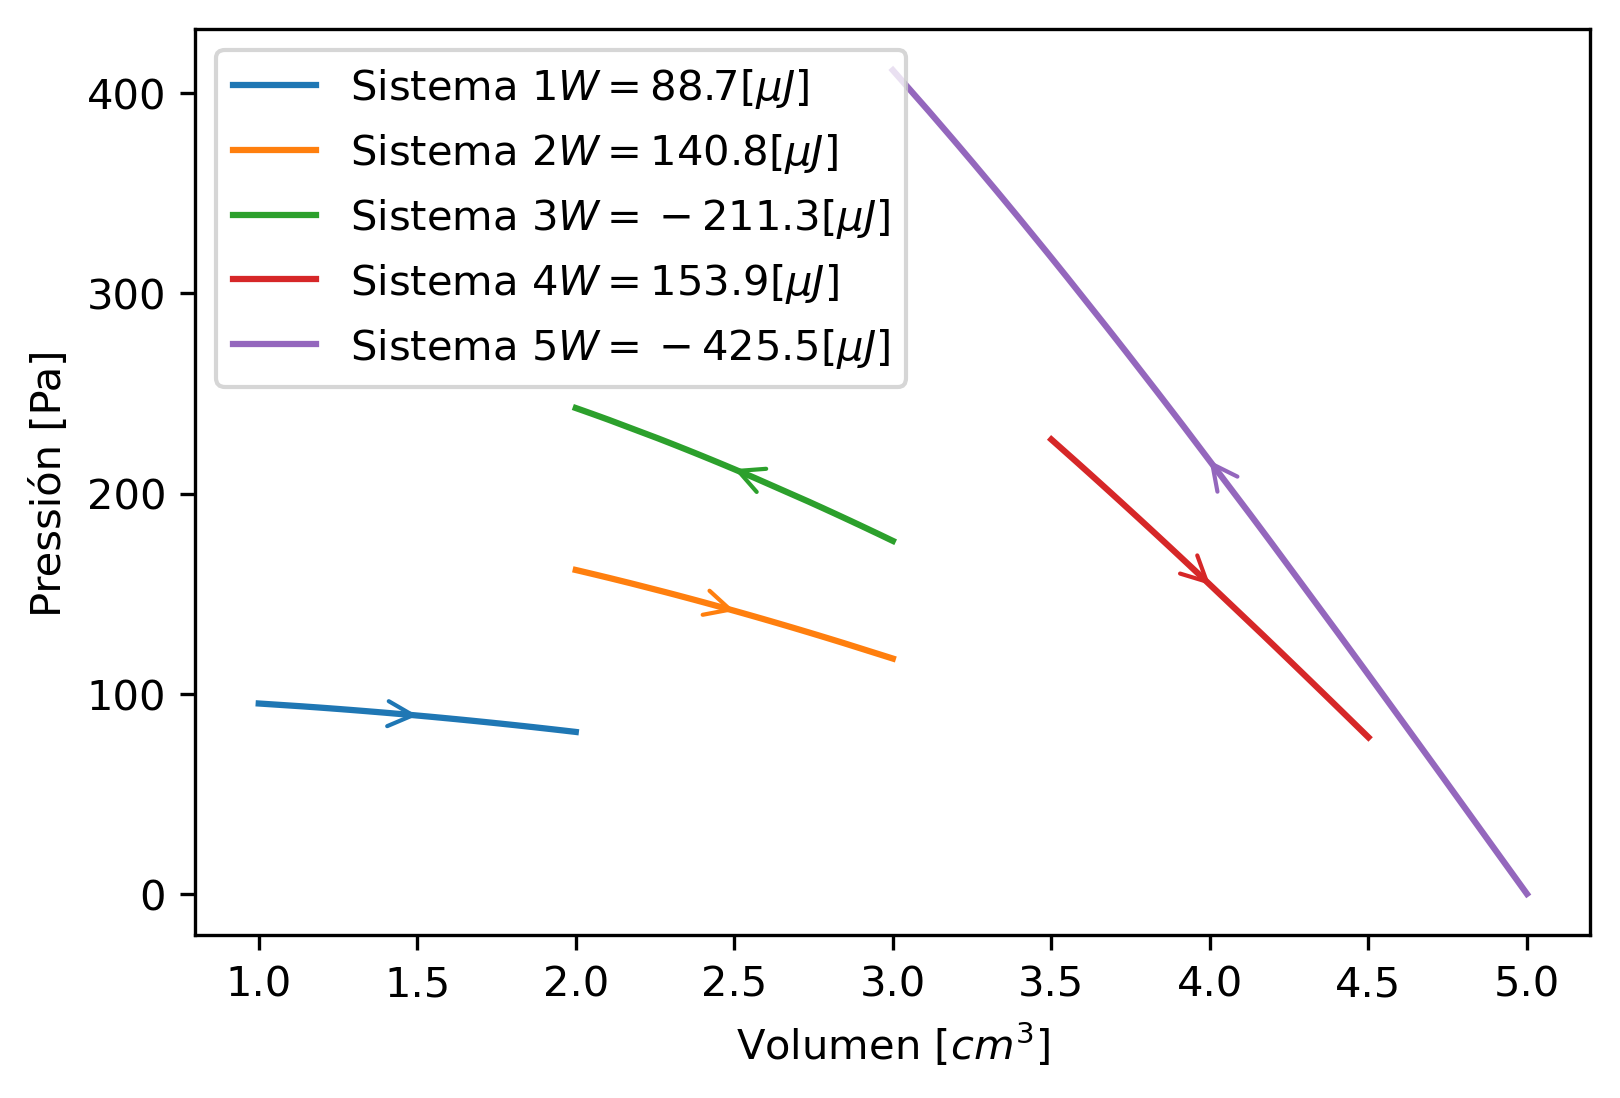

In [6]:
plt.figure(dpi=300)
data_dict = {} ; show_W = True
for idx, (vi, vf, pm) in enumerate(zip(vol_i, vol_f, p_max)):
    vol = volume(vi, vf)
    p = pressure(vol, pm)
    va = vol[-1]; pa = p[-1]
    W = np.trapz(p, x=vol)
    name = 'Sistema %d' % (idx+1)
    label = '%s' % name
    if show_W:
        label += '$W=%0.1f[\mu J]$' % W
    data_dict[name] = {
        'W': W,
        'df': pd.DataFrame({
            'Volumen [cm^3]': vol,
            'Presión [Pa]': p
        })
    }
    direction = 'right' if (vol[-1] - vol[-2]) > 0 else 'left'
    lines = plt.plot(vol, p, label=label)
    add_arrow(lines[0])
plt.xlabel('Volumen $[cm^3]$')
plt.ylabel('Pressión [Pa]')
_ = plt.legend()

In [7]:
for name in data_dict:
    file_name = '../data/S5_%s.csv' % name
    data_dict[name]['df'].to_csv(file_name)
